In [26]:
import pickle
from sklearn import linear_model
import pandas as pd

In [27]:
# get the pre-processed data.
with open('data_processed', 'rb') as f:
    data = pickle.load(f)
data.head()

,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,avg
0,29,0,0,0,0,114.30
1,36,1,0,0,0,94.00
2,37,0,0,0,0,81.00
3,37,1,0,0,0,100.33
4,38,1,0,0,0,99.80


In [28]:
# drop all other columns except age and avg
data.drop(['SEX', 'ASSO MEDICAL PROB', 'H/O INJURY/SURGERY', 'DRUG HISTORY'], axis=1, inplace=True)
data.head()

,AGE,avg
0,29,114.30
1,36,94.00
2,37,81.00
3,37,100.33
4,38,99.80


In [29]:
# divide data into testing and training models
from sklearn import model_selection
X = data['AGE']
Y = data['avg']

In [30]:
# reshaping since our data has only one column, but the linear model expects a 2D array
X = X.values.reshape(-1, 1)

In [85]:
# preprocessing the data to normalize results
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit_transform(X)


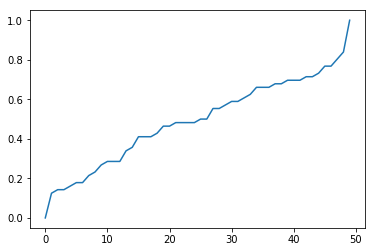

In [86]:
from matplotlib import pyplot 
%matplotlib inline

pyplot.plot(X)
pyplot.show()

In [87]:
# splititng data into training and testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)
X_train.shape

(37, 1)

In [79]:
# importing and creating our regression model
regression = linear_model.LinearRegression()
# training our mdoel
regression.fit(X_train, Y_train)
# calculating our acccuracy on test data
accuracy = regression.score(X_test,Y_test)

print(accuracy)

0.796451914666


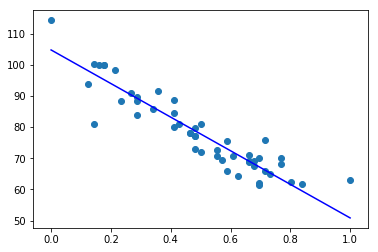

In [88]:
# plot the linear regression line
pyplot.scatter(X,Y)
pyplot.plot(X, regression.predict(X), color='b')